In [20]:
#Nama   :Juan Anemao Sokhi Zidomi
#NIM    :1103204007
#Kelas  :TK-44-G4

In [21]:
#Melakukan import data dari drive
from  google.colab import drive
drive.mount('/content/drive')
#import library pandas
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#melakukan pembacaan dataset dengan mengubah csv menjadi dataframe
file_path='/content/drive/MyDrive/Stars.csv'
star=pd.read_csv(file_path)
star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [23]:
 #Mengganti nama kolom L dengan Relative luminosity ,R dengan Relative radius dan A_M dengan Absolute Magnitude
 star=star.rename(columns={'L': 'Relative Luminosity', 'R':'Relative Radius','A_M':'Absolute Magnitude'})
 star.head()

,Temperature,Relative Luminosity,Relative Radius,Absolute Magnitude,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [24]:
#Ngedrop kolom yang tidak diperlukan seperti Color,spectral class dan Type
star=star.drop(['Color','Spectral_Class','Type'],axis=1)
print(star.head())

   Temperature  Relative Luminosity  Relative Radius  Absolute Magnitude
0         3068             0.002400           0.1700               16.12
1         3042             0.000500           0.1542               16.60
2         2600             0.000300           0.1020               18.70
3         2800             0.000200           0.1600               16.65
4         1939             0.000138           0.1030               20.06


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

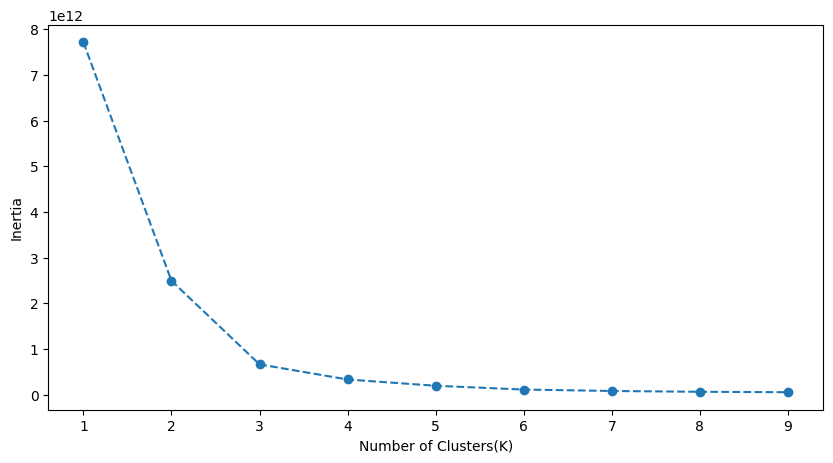

In [26]:
#Melakukan visualiasi nilai cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X=star[['Temperature','Relative Luminosity','Relative Radius','Absolute Magnitude']]
max_k=10
inertia_values=[]
for k in range(1,max_k):
  kmeans=KMeans(n_clusters=k,random_state=0)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,max_k),inertia_values,marker='o',linestyle='--')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


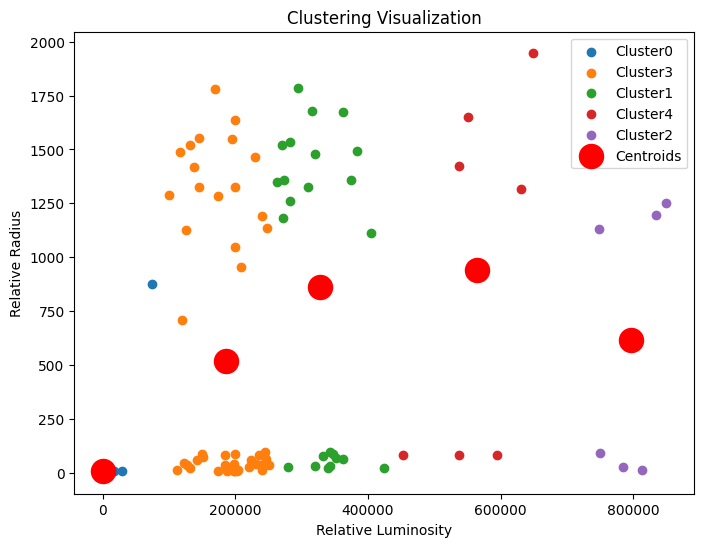

In [30]:
#Melakukan clustering antara kolom Relative luminosity dan relative radius
n_clusters=5
kmeans=KMeans(n_clusters,random_state=0)
star['label']=kmeans.fit_predict(X)
plt.figure(figsize=(8,6))
for label in star['label'].unique():
  plt.scatter(star[star['label']==label] ['Relative Luminosity'],star[star['label']==label]['Relative Radius'],label=f'Cluster{label}')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=300,c='red',label='Centroids')
plt.xlabel('Relative Luminosity')
plt.ylabel('Relative Radius')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

In [31]:
#Menggunakan matrik evaluasi silhoutte_score
from sklearn.metrics import silhouette_score
silhouette_scores={ }
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=0)
  labels=kmeans.fit_predict(X)
  silhouette_avg=silhouette_score(X,labels)
  silhouette_scores[k]=silhouette_avg
for k,silhoutte_avg in silhouette_scores.items():
  print(f"Silhoutte Score for k={k}:{silhoutte_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhoutte Score for k=2:0.7462805703483479
Silhoutte Score for k=3:0.8102645820133265
Silhoutte Score for k=4:0.806342316777581
Silhoutte Score for k=5:0.8087558042821154
Silhoutte Score for k=6:0.8030794054064906
Silhoutte Score for k=7:0.797627579420085
Silhoutte Score for k=8:0.7939934759156482
Silhoutte Score for k=9:0.7905527302483563
Silhoutte Score for k=10:0.7950875337954516


In [32]:
#Menggunakan metrik evaluasi davies_bouldin_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import  KMeans
dbi_scores={}
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=0)
    labels=kmeans.fit_predict(X)
    dbi=davies_bouldin_score(X,labels)
    dbi_scores[k]=dbi

for k,dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}:{dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2:0.4981733206101116
Davies-Bouldin Index for k=3:0.3679470703388681
Davies-Bouldin Index for k=4:0.450979264193759
Davies-Bouldin Index for k=5:0.43160214766384025
Davies-Bouldin Index for k=6:0.42636119539949263
Davies-Bouldin Index for k=7:0.4741845793959452
Davies-Bouldin Index for k=8:0.49222373610255465
Davies-Bouldin Index for k=9:0.49186602115793854
Davies-Bouldin Index for k=10:0.4626800029445663


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
#Menggunakan evaluasi metrik calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
chi_scores={}
for k in range (2,11):
  kmeans=KMeans(n_clusters=k,random_state=0)
  labels=kmeans.fit_predict(X)
  chi=calinski_harabasz_score(X,labels)
  chi_scores[k]=chi

for k,chi in chi_scores.items():
  print(f"Calinski-Harabasz Index for k={k}:{chi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2:497.82595860342593
Calinski-Harabasz Index for k=3:1254.05218807938
Calinski-Harabasz Index for k=4:1733.7459832651775
Calinski-Harabasz Index for k=5:2235.1882094825423
Calinski-Harabasz Index for k=6:3101.8583661511834
Calinski-Harabasz Index for k=7:3554.200274051472
Calinski-Harabasz Index for k=8:3850.712644304767
Calinski-Harabasz Index for k=9:3931.4197706307414
Calinski-Harabasz Index for k=10:4105.196592516552


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
